# (Test) Weather Classification with **Multinomial Logistic Regression**

In [1]:
import pandas as pd

# Load the dataset
file_path = "/Users/jakob/Library/CloudStorage/OneDrive-student.kit.edu/Studium/02_Master/4. Semester/seminar/RoadTrafficNoise/IDMT-Traffic/datasets/df_main_encoded_only.csv"

# Load the dataset
df_weather_classification = pd.read_csv(file_path)

In [2]:
from sklearn.preprocessing import StandardScaler

# List of features to scale
features_to_scale = [
    'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8',
    'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'band_1_dB', 'band_2_dB',
    'band_3_dB', 'band_4_dB', 'band_5_dB', 'band_6_dB', 'band_7_dB', 'band_8_dB',
    'band_9_dB', 'band_10_dB', 'band_11_dB', 'band_12_dB', 'band_13_dB', 'band_14_dB',
    'band_15_dB', 'band_16_dB', 'band_17_dB', 'band_18_dB', 'band_19_dB', 'band_20_dB',
    'band_21_dB', 'band_22_dB', 'band_23_dB', 'band_24_dB', 'band_25_dB', 'band_26_dB',
    'band_27_dB', 'band_28_dB', 'band_29_dB', 'peak_dB_1', 'peak_freq_1', 'peak_dB_2',
    'peak_freq_2', 'peak_dB_3', 'peak_freq_3', 'octband_dB_mean'
]

# Initialize the scaler
scaler = StandardScaler()

# Scale the continuous features
df_weather_classification[features_to_scale] = scaler.fit_transform(df_weather_classification[features_to_scale])

# Display the first few rows of the scaled features
print("Scaled continuous features:")
print(df_weather_classification[features_to_scale].head())

Scaled continuous features:
     mfcc_1    mfcc_2    mfcc_3    mfcc_4    mfcc_5    mfcc_6    mfcc_7  \
0  0.534020 -0.095741  0.317090 -0.199996  1.076871 -0.849158  0.488469   
1 -0.417122  1.236136 -0.463359 -1.258648  0.673683 -2.817347 -1.025860   
2 -0.349961 -0.063312  1.486191  0.617049  1.425379 -0.200482  0.469514   
3 -0.359639  1.370129  0.446450 -0.780061  0.581897 -1.698731 -0.685670   
4 -0.478630 -0.377287  0.783887  1.585644  1.316984  0.916741  0.646383   

     mfcc_8    mfcc_9   mfcc_10  ...  band_27_dB  band_28_dB  band_29_dB  \
0  1.043540  0.232010 -0.497859  ...    0.637304    1.046642    1.040365   
1  0.391742 -0.823542 -2.020080  ...    0.311370    0.580304    0.686623   
2  0.924568  1.123851  0.496119  ...    0.283491    0.677777    0.912659   
3 -0.260536 -0.622390 -1.076207  ...   -0.106405    0.103776    0.330144   
4  1.487036  2.385029  0.324056  ...    1.097757    0.985525    0.976381   

   peak_dB_1  peak_freq_1  peak_dB_2  peak_freq_2  peak_dB_3  pe

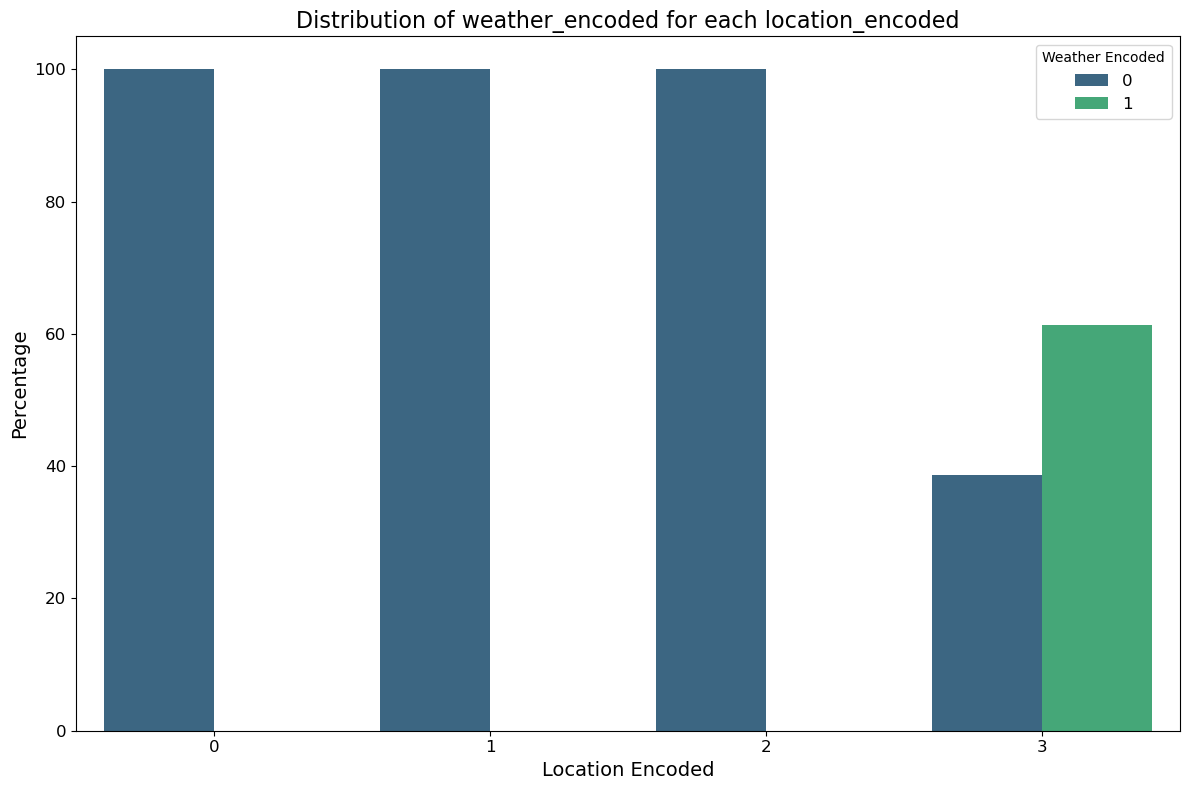

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped DataFrame for plotting
grouped_data = df_weather_classification.groupby(['location_encoded', 'weather_encoded']).size().reset_index(name='count')

# Normalize the counts within each location_encoded
grouped_data['percentage'] = grouped_data.groupby('location_encoded')['count'].transform(lambda x: x / x.sum() * 100)

# Plot the distribution using a Seaborn bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='location_encoded', y='percentage', hue='weather_encoded', palette='viridis')

# Customize the plot
plt.title('Distribution of weather_encoded for each location_encoded', fontsize=16)
plt.xlabel('Location Encoded', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Weather Encoded', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

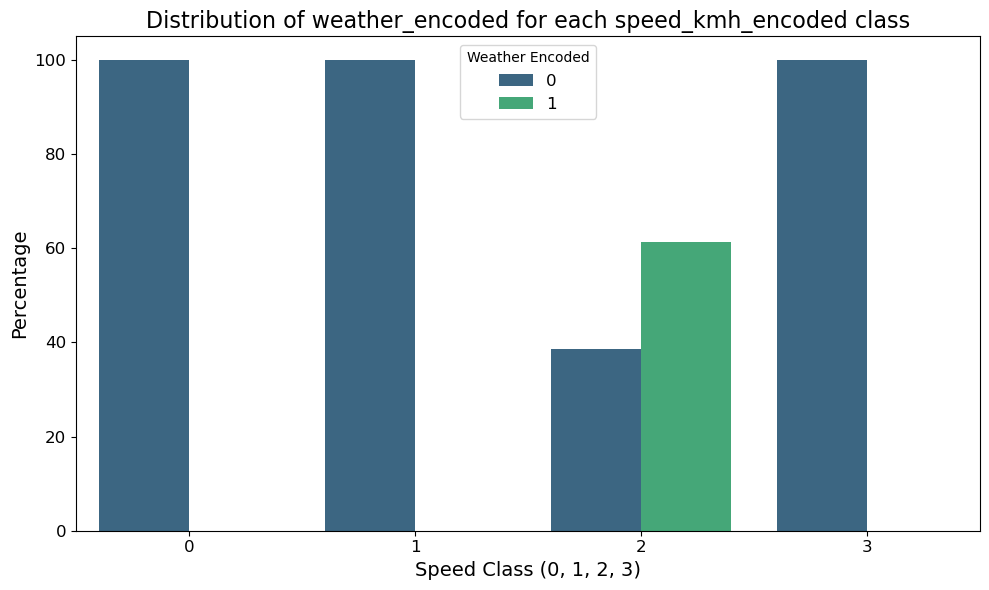

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by speed_kmh_encoded and weather_encoded
grouped_data = df_weather_classification.groupby(['speed_kmh_encoded', 'weather_encoded']).size().reset_index(name='count')

# Normalize the counts within each speed class
grouped_data['percentage'] = grouped_data.groupby('speed_kmh_encoded')['count'].transform(lambda x: x / x.sum() * 100)

# Plot the distribution using a Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='speed_kmh_encoded', y='percentage', hue='weather_encoded', palette='viridis')

# Customize the plot
plt.title('Distribution of weather_encoded for each speed_kmh_encoded class', fontsize=16)
plt.xlabel('Speed Class (0, 1, 2, 3)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Weather Encoded', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

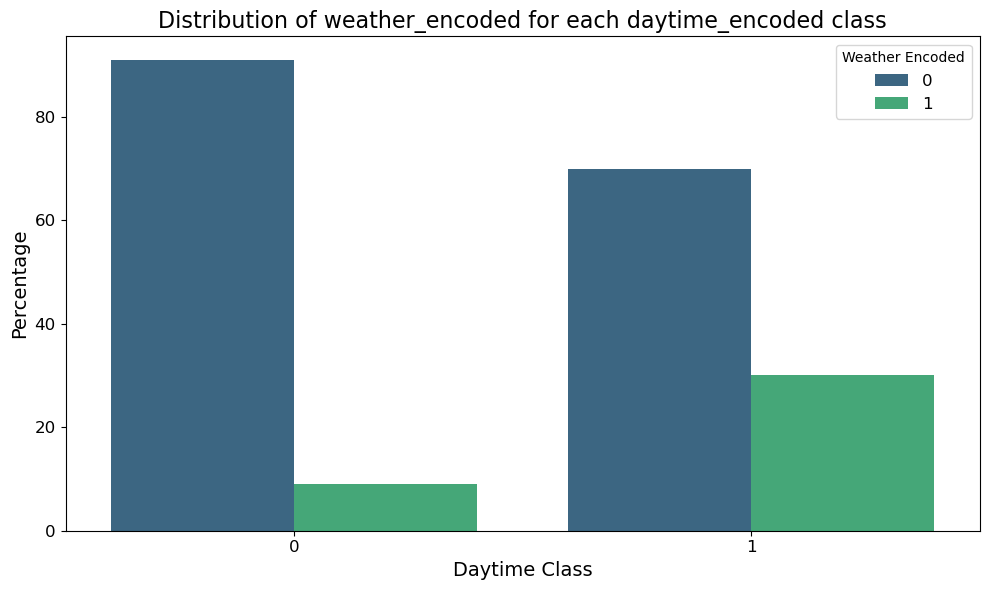

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by daytime_encoded and weather_encoded
grouped_data = df_weather_classification.groupby(['daytime_encoded', 'weather_encoded']).size().reset_index(name='count')

# Normalize the counts within each daytime class
grouped_data['percentage'] = grouped_data.groupby('daytime_encoded')['count'].transform(lambda x: x / x.sum() * 100)

# Plot the distribution using a Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='daytime_encoded', y='percentage', hue='weather_encoded', palette='viridis')

# Customize the plot
plt.title('Distribution of weather_encoded for each daytime_encoded class', fontsize=16)
plt.xlabel('Daytime Class', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Weather Encoded', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Extract features and target
X = df_weather_classification.drop(columns=['file', 'weather_encoded', 'is_background_encoded', 'Unnamed: 0', 'location_encoded', 'speed_kmh_encoded'])
y = df_weather_classification['weather_encoded']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

/Users/jakob/miniconda3/envs/seminar2024/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [7]:
# Extract coefficients from the trained logistic regression model
coefficients = pd.Series(log_reg.coef_[0], index=X.columns)

# Sort the coefficients in descending order
sorted_coefficients = coefficients.sort_values(ascending=False)

# Print the sorted coefficients
print(sorted_coefficients)

band_18_dB                  1.558395
band_28_dB                  1.368049
band_24_dB                  1.041442
daytime_encoded             0.912471
band_21_dB                  0.910178
band_13_dB                  0.875494
band_12_dB                  0.853896
mfcc_10                     0.827565
vehicle_encoded             0.422261
band_16_dB                  0.312142
mfcc_7                      0.284206
band_22_dB                  0.275913
mfcc_5                      0.218856
source_direction_encoded    0.202491
mfcc_13                     0.168042
mfcc_6                      0.156920
band_3_dB                   0.146437
band_20_dB                  0.118342
mfcc_12                     0.113566
octband_dB_mean             0.041381
band_19_dB                  0.002314
peak_dB_2                  -0.000957
peak_freq_3                -0.005797
peak_freq_2                -0.010794
mfcc_9                     -0.012432
band_10_dB                 -0.046877
peak_freq_1                -0.057011
b

In [8]:
# Evaluate the model
print("Classification Report on test set:")
print(classification_report(y_test, y_pred))

Classification Report on test set:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1541
           1       0.88      0.83      0.86       332

    accuracy                           0.95      1873
   macro avg       0.92      0.90      0.91      1873
weighted avg       0.95      0.95      0.95      1873

